In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 로드
- 다양한 소스에서 데이터를 로드한다. 파일, 데이터베이스, API 등에서 데이터를 불러온다.
- 데이터가 로드된 후에는 구조를 확인하기 위해 첫 몇 줄의 데이터를 출력해 본다.

<1100 Instagram Users Datetime Posts Data>
- 출처: https://www.kaggle.com/datasets/vasileiosmpletsos/1100-instagram-users-datetime-posts-data/data
- 특징: 컬럼 정의서 및 데이터 설명이 존재하지 않음


In [67]:
df = pd.read_csv('./data/Instagram_Data.csv')
df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178917,1089,9,821,0.07,Image,0,1,2018-11-29 14:40:11,2018,11,29,14,40
178918,1089,3,822,0.02,Image,3,0,2018-11-28 20:59:19,2018,11,28,20,59
178919,1089,2,822,0.01,Image,0,0,2018-11-28 16:27:32,2018,11,28,16,27
178920,1089,14,822,0.10,Image,0,2,2018-11-28 14:37:13,2018,11,28,14,37


# 2. 데이터 구조 및 기초 통계 확인
- 데이터의 구조를 파악하기 위해 컬럼 정보와 데이터 타입을 확인한다.
- 데이터의 기본 통계 정보를 출력하여 각 변수의 분포와 특성을 살펴본다.
- df.head(), df.info(), df.describe() 등의 함수를 사용한다.


In [68]:
df.columns

Index(['User uuid', 'Likes', 'Days passed from post', 'Likes Score', 'Type',
       'Numer of Tags', 'Numer of Comments', 'Date Posted', 'Year', 'Month',
       'Day', 'Hour', 'Minute'],
      dtype='object')

In [69]:
df.shape

(178922, 13)

In [70]:
df['User uuid'].unique() #총 1089명 유저의 인스타그램 데이터를 분석한 것을 확인

array([   1,    2,    3, ..., 1087, 1088, 1089], dtype=int64)

In [71]:
df.info() #Type과 Date Posted외 모두 수치형 데이터임 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178922 entries, 0 to 178921
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   User uuid              178922 non-null  int64  
 1   Likes                  178922 non-null  int64  
 2   Days passed from post  178922 non-null  int64  
 3   Likes Score            178922 non-null  float64
 4   Type                   178922 non-null  object 
 5   Numer of Tags          178922 non-null  int64  
 6   Numer of Comments      178922 non-null  int64  
 7   Date Posted            178922 non-null  object 
 8   Year                   178922 non-null  int64  
 9   Month                  178922 non-null  int64  
 10  Day                    178922 non-null  int64  
 11  Hour                   178922 non-null  int64  
 12  Minute                 178922 non-null  int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 17.7+ MB


In [72]:
df.describe()

,User uuid,Likes,Days passed from post,Likes Score,Numer of Tags,Numer of Comments,Year,Month,Day,Hour,Minute
count,178922.000000,1.789220e+05,178922.000000,178922.000000,178922.000000,1.789220e+05,178922.000000,178922.000000,178922.000000,178922.000000,178922.000000
mean,546.316948,4.298806e+04,447.477510,0.270961,3.578045,5.622285e+02,2019.412107,6.764814,15.694219,13.396435,28.741737
std,317.200142,2.604648e+05,492.620418,0.210007,6.877008,1.201380e+04,1.374731,3.753390,8.824645,7.385343,17.678904
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,2010.000000,1.000000,1.000000,0.000000,0.000000
25%,273.000000,1.340000e+02,107.000000,0.100000,0.000000,4.000000e+00,2019.000000,3.000000,8.000000,7.000000,13.000000
50%,540.000000,1.064000e+03,260.000000,0.220000,0.000000,2.300000e+01,2020.000000,7.000000,16.000000,16.000000,29.000000
75%,829.000000,1.074300e+04,612.000000,0.390000,3.000000,1.357500e+02,2020.000000,10.000000,23.000000,20.000000,44.000000
max,1089.000000,1.544569e+07,3775.000000,1.000000,31.000000,2.907644e+06,2021.000000,12.000000,31.000000,23.000000,59.000000


# 3. 결측치 및 이상치 탐색
- 결측치(NaN) 값이 존재하는지 확인하고, 이를 처리하는 방법을 결정한다.
- 데이터에 존재하는 이상치(Outlier)를 탐지하고, 이를 어떻게 처리할지 결정한다.
- df.isnull().sum(), df.boxplot() 등의 함수를 사용한다.

In [73]:
df.isnull().sum() # 결측치(NaN)값은 존재하지 않음 확인

User uuid                0
Likes                    0
Days passed from post    0
Likes Score              0
Type                     0
Numer of Tags            0
Numer of Comments        0
Date Posted              0
Year                     0
Month                    0
Day                      0
Hour                     0
Minute                   0
dtype: int64

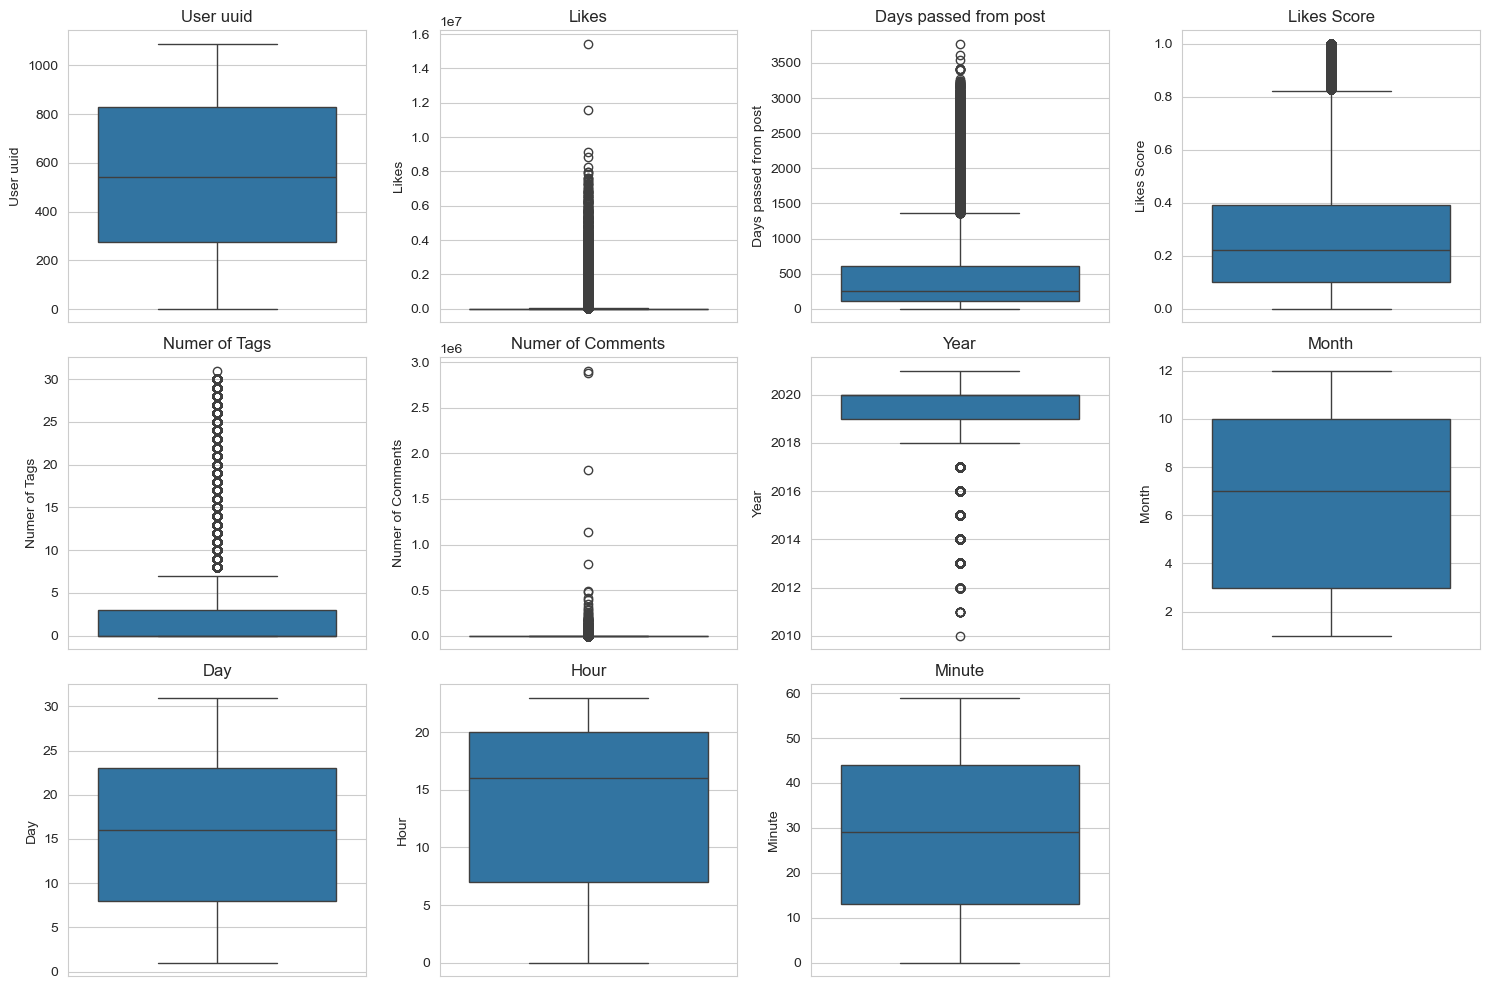

In [74]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 4 + 1, 4, i) 
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

# "Days passed from past"가 데이터 평균보다 유난히 큰, "Year"가 데이터 평균보다 유난히 작은 데이터는 정제 예정

## 'Likes'와 'Likes Score' 간 상관관계 확인

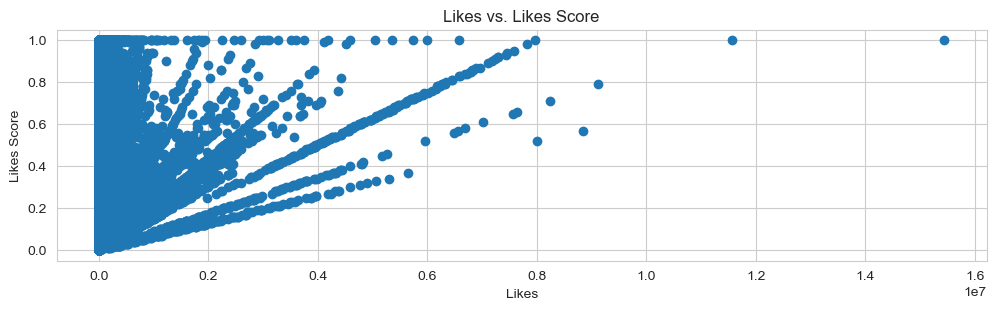

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 3))
plt.scatter(df['Likes'], df['Likes Score'])
plt.xlabel('Likes')
plt.ylabel('Likes Score')
plt.title('Likes vs. Likes Score')
plt.show()

# 그래프 상 상관관꼐 확인이 어려움

In [76]:
like_correlation = df['Likes Score'].corr(df['Likes'], method='pearson')
like_correlation

0.0987513942955368

Pearson 상관 계수 확인 시, "상관 관계 없음"으로 확인됨

![pearson](PNG/pearson.png)


In [77]:
from scipy.stats import linregress

# 선형 회귀 분석으로 도출된 값인지 확인
slope, intercept, r_value, p_value, std_err = linregress(df['Likes'], df['Likes Score'])
print(f"Likes Score ≈ {slope} * Likes + {intercept}")

Likes Score ≈ 7.9621178292857e-08 * Likes + 0.2675381616716941


In [78]:
# 정규화로 도출된 값인지 확인
likes_min = df['Likes'].min()
likes_max = df['Likes'].max()
df['Likes_Normalized'] = (df['Likes'] - likes_min) / (likes_max - likes_min)

# 표준화로 도출된 값인지 확인
likes_mean = df['Likes'].mean()
likes_std = df['Likes'].std()
df['Likes_Standardized'] = (df['Likes'] - likes_mean) / likes_std

# 실제 'Likes Score'와의 차이 확인
normalized_difference = np.abs(df['Likes Score'] - df['Likes_Normalized']).mean()
standardized_difference = np.abs(df['Likes Score'] - df['Likes_Standardized']).mean()
print("Likes Score - normalized Likes:", normalized_difference)
print("Likes Score - standardized Likes:", standardized_difference)

# 일반적으로 차이가 0.05 이하라면, 거의 일치한다고 볼 수 있는 것에 비해 많이 다른 것을 확인


Likes Score - normalized Likes: 0.2681806318386473
Likes Score - standardized Likes: 0.4763521176482871


### 사용자별 정규화 및 표준화 확인
- 일반적으로 차이가 0.05 이하라면, 거의 일치한다고 볼 수 있기에 'Likes Score'는 **사용자별로 Likes를 정규화한 값** 임을 확인
- correlation도 0.97로 Pearson 상관계수 상으로도 "매우 높은 상관관계"에 해당함

In [79]:
user = df.groupby('User uuid')

# **사용자별**로 정규화 혹은 표준화된 값인지 확인
df['Likes_Normalized_By_User'] = user['Likes'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df['Likes_Standardized_By_User'] = user['Likes'].transform(lambda x: (x - x.mean()) / x.std())

# 실제 Likes Score와의 차이 계산
normalized_by_user_difference = np.abs(df['Likes Score'] - df['Likes_Normalized_By_User']).mean()
standardized_by_user_difference = np.abs(df['Likes Score'] - df['Likes_Standardized_By_User']).mean()

print("Likes Score - user-normalized Likes:", normalized_by_user_difference)
print("Likes Score - user-standardized Likes:", standardized_by_user_difference)


Likes Score - user-normalized Likes: 0.03914300876422601
Likes Score - user-standardized Likes: 0.6844494112851073


In [80]:
like_correlation_user_normalized = df['Likes Score'].corr(df['Likes_Normalized_By_User'])
like_correlation_user_normalized


0.9783163874982663

In [81]:
df.drop(columns= ['Likes_Normalized', 'Likes_Standardized', 'Likes_Normalized_By_User', 'Likes_Standardized_By_User'], inplace=True)


# 4. 데이터 시각화를 통한 탐색
- 데이터를 시각화하여 변수 간의 관계, 분포 등을 파악한다.
- 히스토그램, 박스플롯, 상관관계 행렬 등 다양한 그래프를 통해 데이터의 특성을 시각적으로 확인한다.
- sns.countplot(), sns.heatmap() 등의 함수를 사용한다.


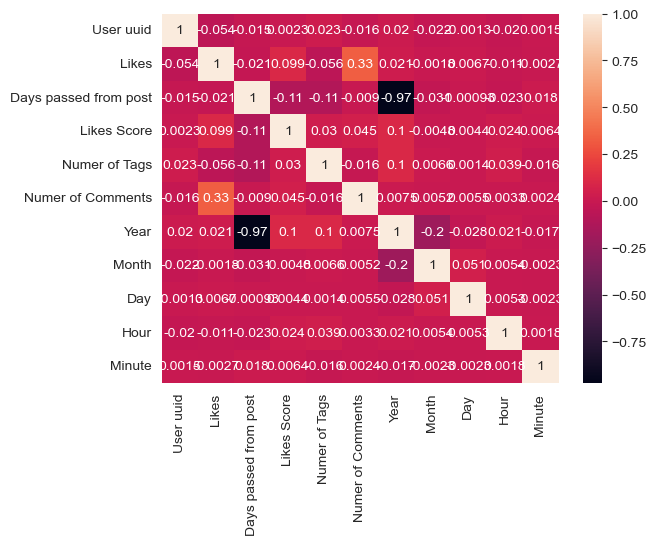

In [82]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.show()

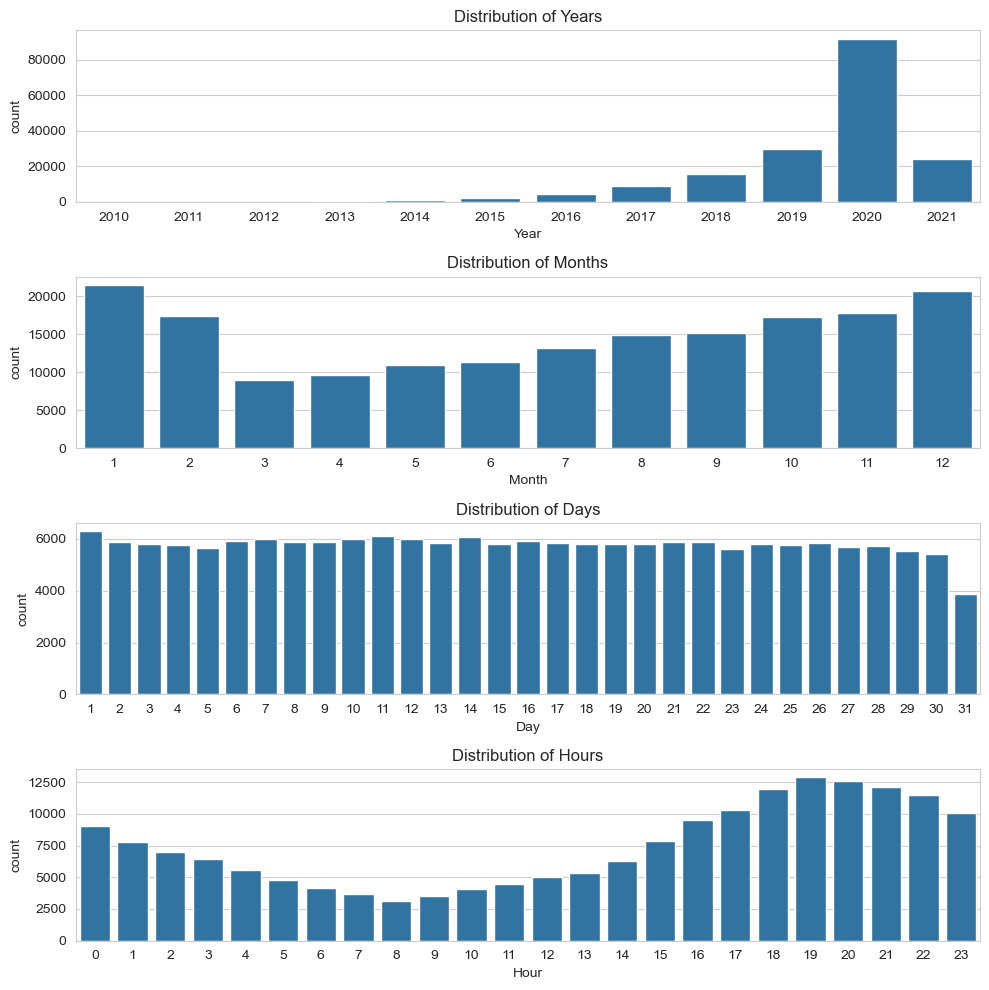

In [83]:
fig, axes = plt.subplots(4, 1, figsize=(10, 10))

# Year
sns.countplot(x=df['Year'], ax=axes[0])
axes[0].set_title('Distribution of Years')
axes[0].set_xlabel('Year')

# Month
sns.countplot(x=df['Month'], ax=axes[1])
axes[1].set_title('Distribution of Months')
axes[1].set_xlabel('Month')

# Day
sns.countplot(x=df['Day'], ax=axes[2])
axes[2].set_title('Distribution of Days')
axes[2].set_xlabel('Day')

# Hour
sns.countplot(x=df['Hour'], ax=axes[3])
axes[3].set_title('Distribution of Hours')
axes[3].set_xlabel('Hour')

# 그래프 간 간격 조정
plt.tight_layout()
plt.show()


# 5. 데이터 정제 및 전처리
- 필요 없는 변수나 중복 데이터를 제거한다.
- 범주형 데이터를 처리하거나, 스케일링 및 정규화를 통해 모델에 적합한 형태로 데이터를 변환한다.
- df.drop(), df.fillna(), pd.get_dummies() 등의 함수를 사용한다.

## Day(수치형 데이터)를 Weekday(범주형 데이터)로 변환하기

In [84]:
import time

# Clean/Preprocessing
df['Date Posted'] = pd.to_datetime(df['Date Posted'])
df['Weekday'] = df['Date Posted'].dt.strftime("%A")
df['Workday'] = df['Weekday'].apply(lambda x: False if x in ['Saturday', 'Sunday'] else True)

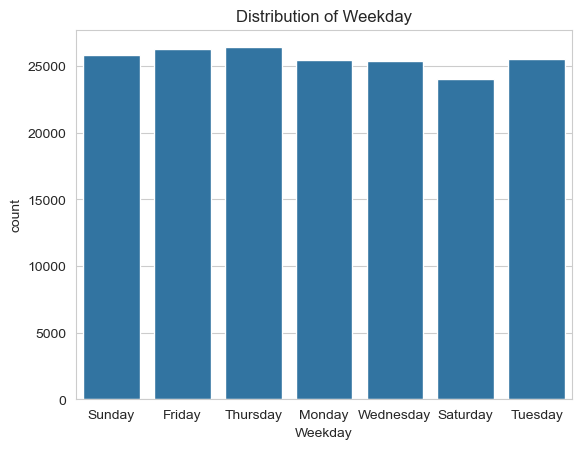

In [85]:
sns.countplot(x=df['Weekday'])
plt.title('Distribution of Weekday')
plt.xlabel('Weekday')
plt.show()

## 오래된 데이터 (이상치)는 제거하여 Year의 분포를 균일하게 하기

In [86]:
# 1사분위(Q1)와 3사분위(Q3) 계산
Q1 = df['Days passed from post'].quantile(0.25)
Q3 = df['Days passed from post'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3)
# 이상치 기준 계산
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound, upper_bound)

df = df[df['Days passed from post'] <= upper_bound]

107.0 612.0
-650.5 1369.5


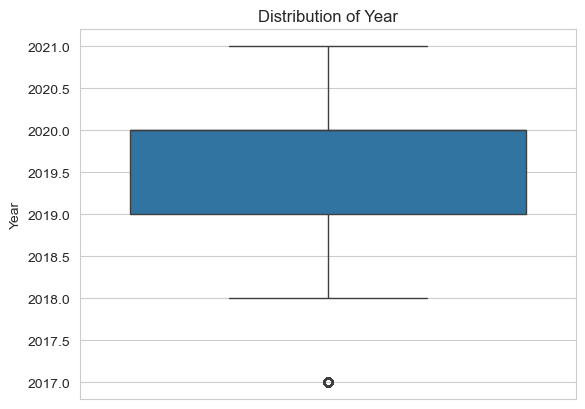

In [87]:
sns.boxplot(df['Year'])
plt.title('Distribution of Year')
plt.show()

# 6. 데이터 변환 및 피처 엔지니어링
- 새로운 피처를 생성하거나 기존 피처를 변환하여 분석에 적합한 형태로 데이터를 조정한다.
- 로그 변환, 다항식 피처 추가 등 다양한 기법을 통해 데이터를 변환할 수 있다.
- np.log(), PolynomialFeatures() 등의 함수를 사용한다.

In [88]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

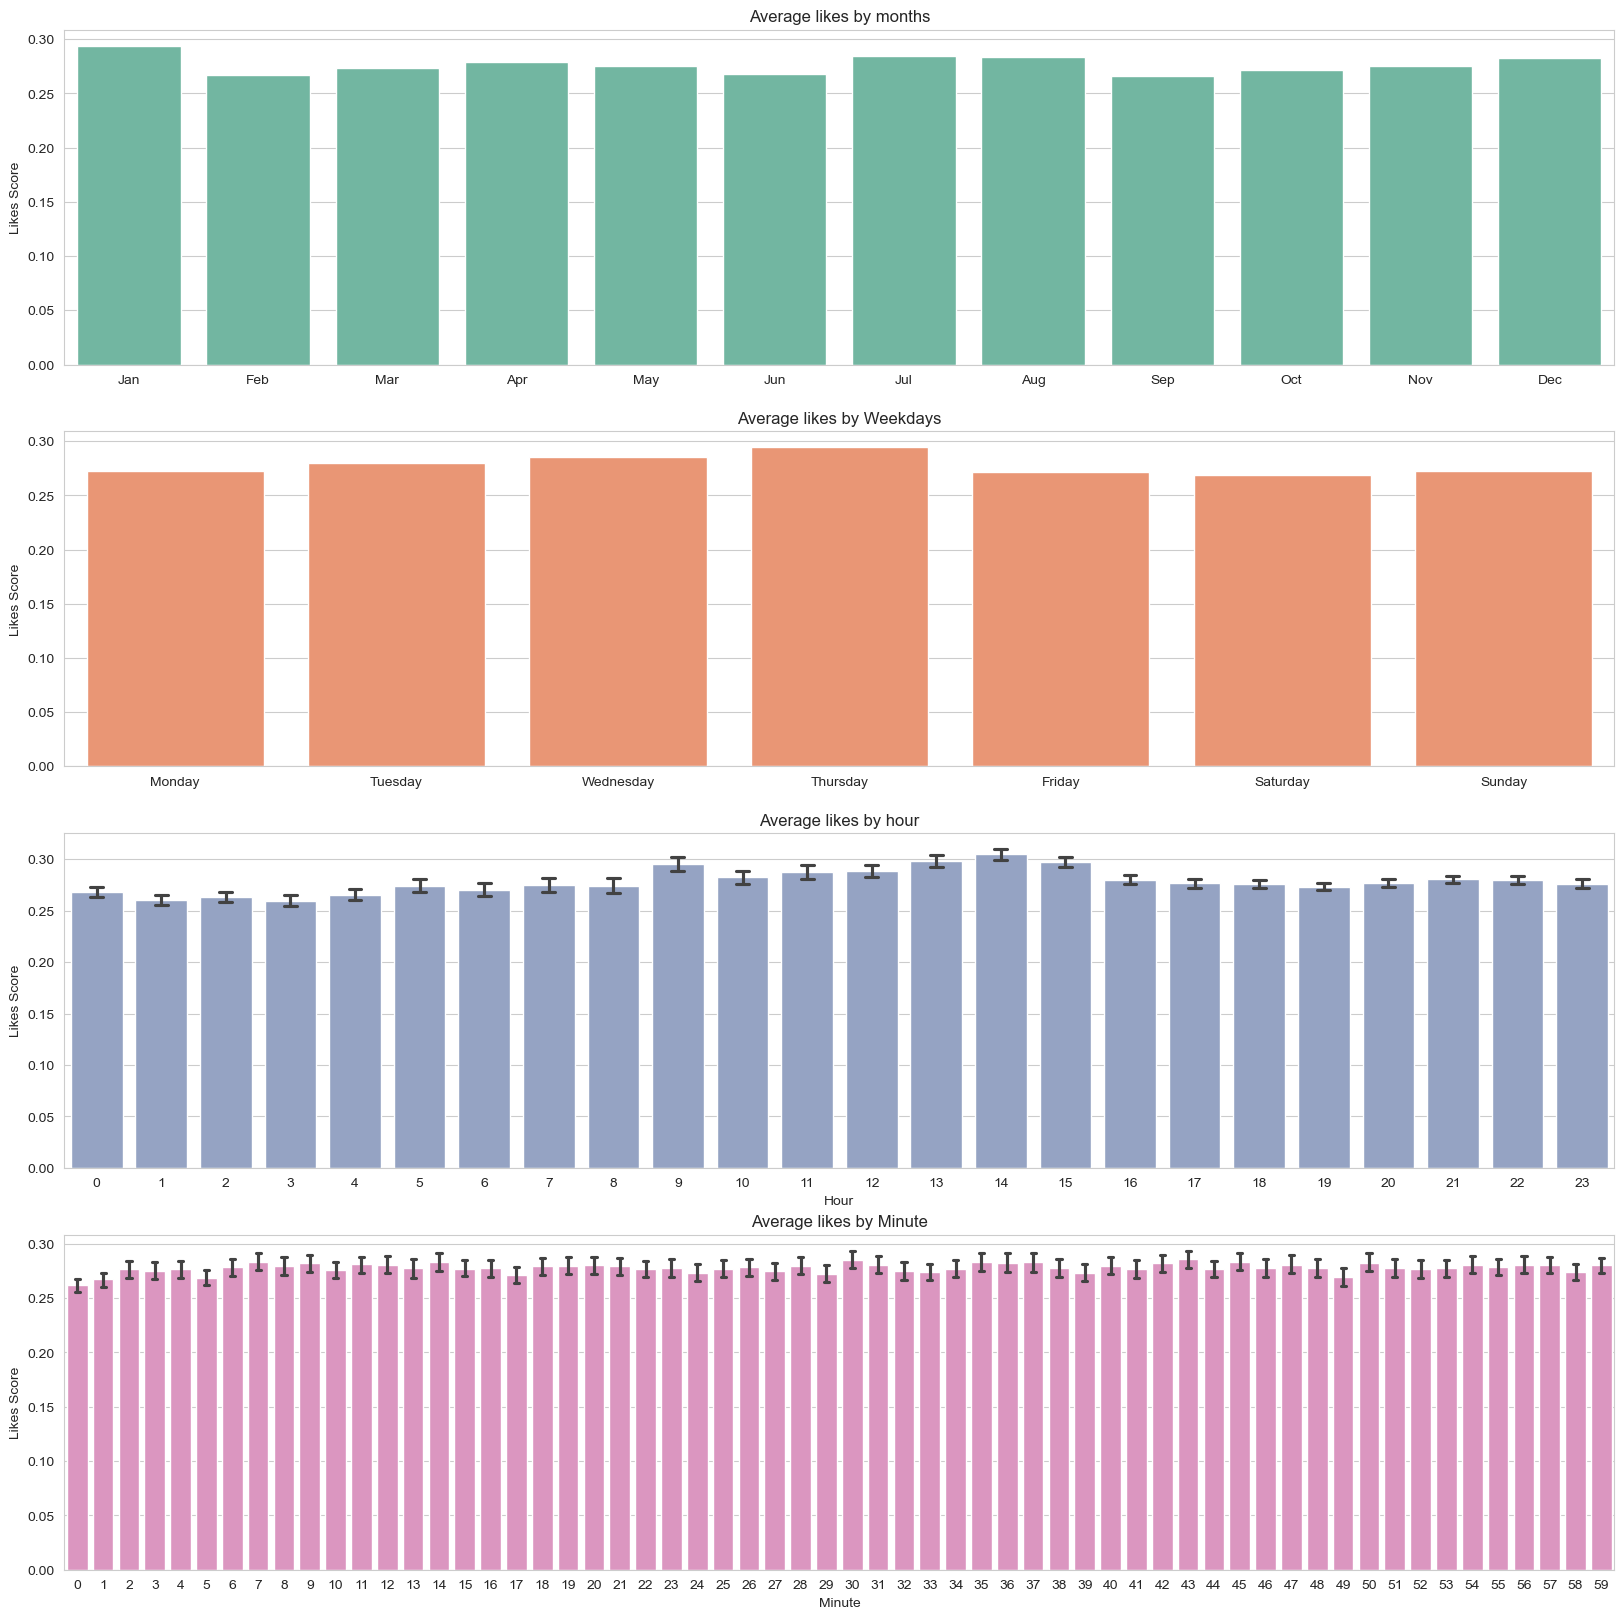

In [89]:
fig, ax = plt.subplots(4, 1, figsize=(20, 4*5))
colors = sns.color_palette("Set2", 4) 

sns.barplot(x=months, y=df.groupby('Month')['Likes Score'].mean(), ax=ax[0], color=colors[0])
ax[0].title.set_text('Average likes by months')

sns.barplot(x=weekdays, y=df.groupby('Weekday')['Likes Score'].mean(), ax=ax[1], color=colors[1])
ax[1].title.set_text('Average likes by Weekdays')

sns.barplot(x='Hour', y='Likes Score', data=df, ax=ax[2], capsize=.2, color=colors[2])
ax[2].title.set_text("Average likes by hour")

sns.barplot(x='Minute', y='Likes Score', data=df, ax=ax[3], capsize=.2, color=colors[3])
ax[3].title.set_text("Average likes by Minute")


## user를 pca를 통해 user group으로 나누기

C:\Users\playdata2\AppData\Local\Temp\ipykernel_1208\3067143926.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'User group'] = kmeans.fit_predict(pca_df)


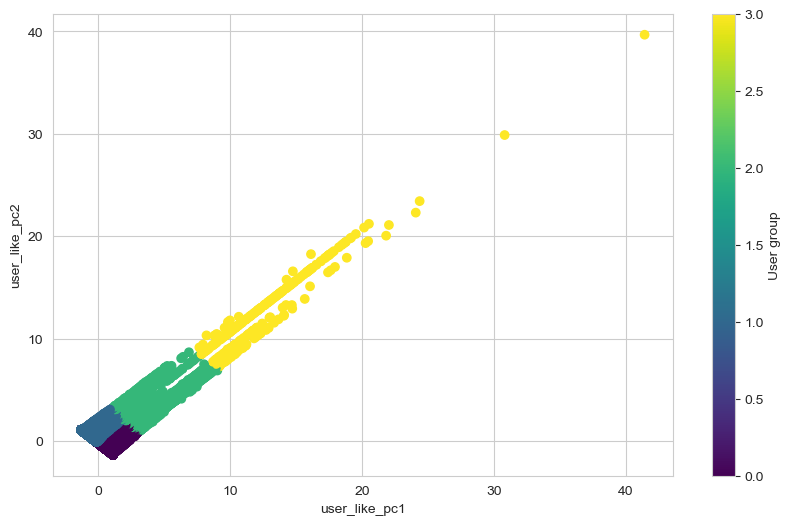

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 사용할 피쳐 선택
features = ['User uuid', 'Likes']

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# PCA 객체 생성
pca = PCA(n_components=2)  # 두 개의 주성분으로 축소
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result, columns=['user_like_pc1', 'user_like_pc2'])

from sklearn.cluster import KMeans

# K-Means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
df.loc[:, 'User group'] = kmeans.fit_predict(pca_df)

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['user_like_pc1'], pca_df['user_like_pc2'], c=df['User group'], cmap='viridis')
plt.xlabel('user_like_pc1')
plt.ylabel('user_like_pc2')
plt.colorbar(label='User group')
plt.show()


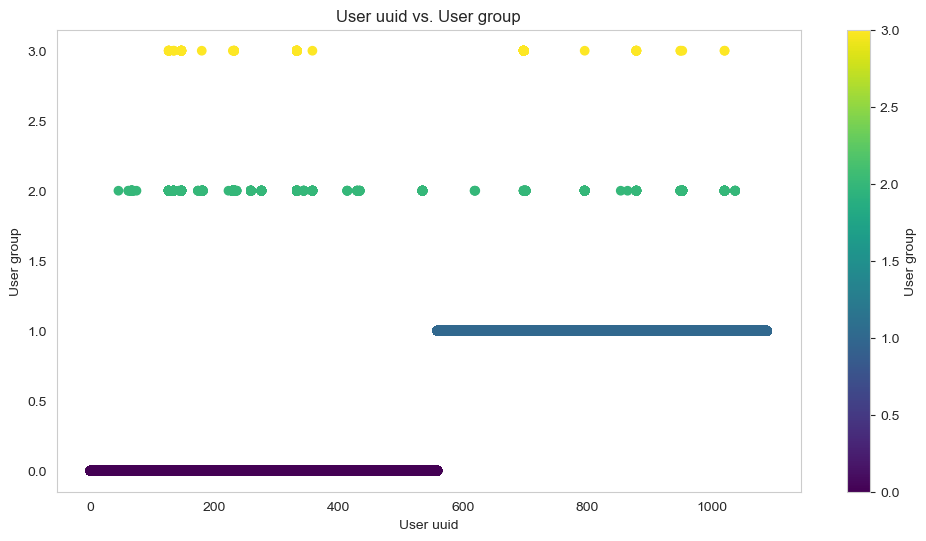

In [91]:
plt.figure(figsize=(12, 6))
plt.scatter(df['User uuid'], df['User group'], c=df['User group'], cmap='viridis')
plt.title('User uuid vs. User group')
plt.xlabel('User uuid')
plt.ylabel('User group')
plt.colorbar(label='User group')
plt.grid()
plt.show()

## hour를 pca를 통해 hour zone으로 나누기

C:\Users\playdata2\AppData\Local\Temp\ipykernel_1208\4103582997.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Hour zone'] = kmeans.fit_predict(pca_df)


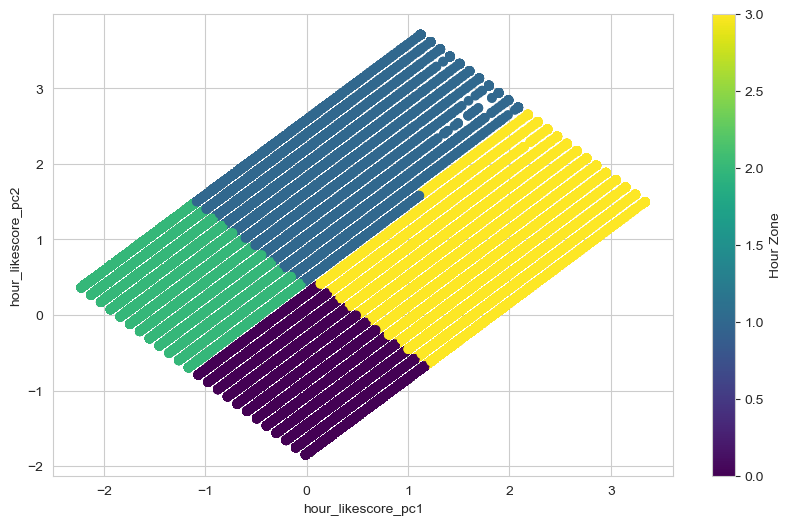

In [92]:

# 사용할 피쳐 선택
features = ['Hour','Likes Score']

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# PCA 객체 생성
pca = PCA(n_components=2)  # 두 개의 주성분으로 축소
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_result, columns=['hour_likescore_pc1', 'hour_likescore_pc2'])

from sklearn.cluster import KMeans

# K-Means 클러스터링
kmeans = KMeans(n_clusters=4, random_state=42)
df.loc[:, 'Hour zone'] = kmeans.fit_predict(pca_df)

plt.figure(figsize=(10, 6))
plt.scatter(pca_df['hour_likescore_pc1'], pca_df['hour_likescore_pc2'], c=df['Hour zone'], cmap='viridis')
plt.xlabel('hour_likescore_pc1')
plt.ylabel('hour_likescore_pc2')
plt.colorbar(label='Hour Zone')
plt.show()


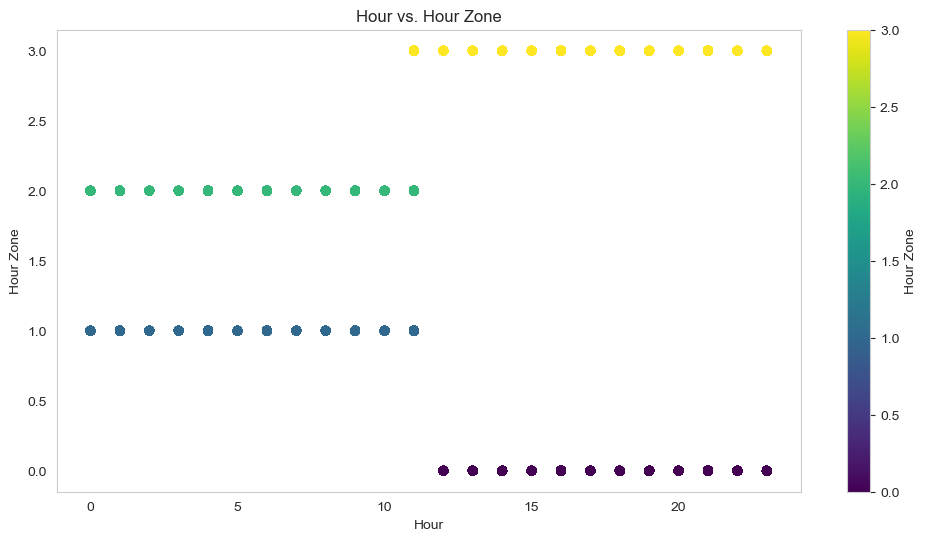

In [93]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Hour'], df['Hour zone'], c=df['Hour zone'], cmap='viridis')
plt.title('Hour vs. Hour Zone')
plt.xlabel('Hour')
plt.ylabel('Hour Zone')
plt.colorbar(label='Hour Zone')
plt.grid()
plt.show()

In [94]:
# 각 Hour와 Hour Zone의 관계를 출력
hour_zone_counts = df.groupby('Hour zone')['Hour'].value_counts().unstack(fill_value=0)
print(hour_zone_counts)

# 클러스터 중심 확인
centers = kmeans.cluster_centers_
print("Cluster Centers:\n", centers)


Hour         0     1     2     3     4     5     6     7     8     9   ...  \
Hour zone                                                              ...   
0             0     0     0     0     0     0     0     0     0     0  ...   
1          2611  2123  1953  1752  1496  1365  1208  1097   952  1211  ...   
2          5714  5020  4478  4199  3585  2983  2655  2278  1972  2130  ...   
3             0     0     0     0     0     0     0     0     0     0  ...   

Hour         14    15    16    17    18    19    20    21    22    23  
Hour zone                                                              
0          3901  4978  6279  6838  7978  8532  8190  7771  7394  6492  
1             0     0     0     0     0     0     0     0     0     0  
2             0     0     0     0     0     0     0     0     0     0  
3          2069  2479  2749  2903  3392  3599  3607  3490  3245  2774  

[4 rows x 24 columns]
Cluster Centers:
 [[ 0.08964098 -0.85026994]
 [-0.03991996  1.66509099]
 [-1

In [95]:
df

,User uuid,Likes,Days passed from post,Likes Score,Type,Numer of Tags,Numer of Comments,Date Posted,Year,Month,Day,Hour,Minute,Weekday,Workday,User group,Hour zone
0,1,506,657,0.74,Image,3,11,2019-05-12 21:18:39,2019,5,12,21,18,Sunday,False,0,3
1,1,385,657,0.57,Image,0,1,2019-05-12 14:25:55,2019,5,12,14,25,Sunday,False,0,3
2,1,373,666,0.55,Images,4,15,2019-05-03 15:18:37,2019,5,3,15,18,Friday,True,0,3
3,1,312,667,0.46,Images,4,1,2019-05-02 16:40:38,2019,5,2,16,40,Thursday,True,0,3
4,1,513,674,0.75,Images,5,0,2019-04-25 16:51:58,2019,4,25,16,51,Thursday,True,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178917,1089,9,821,0.07,Image,0,1,2018-11-29 14:40:11,2018,11,29,14,40,Thursday,True,1,0
178918,1089,3,822,0.02,Image,3,0,2018-11-28 20:59:19,2018,11,28,20,59,Wednesday,True,1,0
178919,1089,2,822,0.01,Image,0,0,2018-11-28 16:27:32,2018,11,28,16,27,Wednesday,True,1,0
178920,1089,14,822,0.10,Image,0,2,2018-11-28 14:37:13,2018,11,28,14,37,Wednesday,True,1,0


In [97]:
# 원-핫 인코딩
input = df.drop(columns=['User uuid','Likes','Year','Day','Hour','Minute','Date Posted'])
df_encoded = pd.get_dummies(input)
df_encoded


,Days passed from post,Likes Score,Numer of Tags,Numer of Comments,Month,Workday,User group,Hour zone,Type_Image,Type_Images,Type_Video,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,657,0.74,3,11,5,False,0,3,True,False,False,False,False,False,True,False,False,False
1,657,0.57,0,1,5,False,0,3,True,False,False,False,False,False,True,False,False,False
2,666,0.55,4,15,5,True,0,3,False,True,False,True,False,False,False,False,False,False
3,667,0.46,4,1,5,True,0,3,False,True,False,False,False,False,False,True,False,False
4,674,0.75,5,0,4,True,0,3,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178917,821,0.07,0,1,11,True,1,0,True,False,False,False,False,False,False,True,False,False
178918,822,0.02,3,0,11,True,1,0,True,False,False,False,False,False,False,False,False,True
178919,822,0.01,0,0,11,True,1,0,True,False,False,False,False,False,False,False,False,True
178920,822,0.10,0,2,11,True,1,0,True,False,False,False,False,False,False,False,False,True


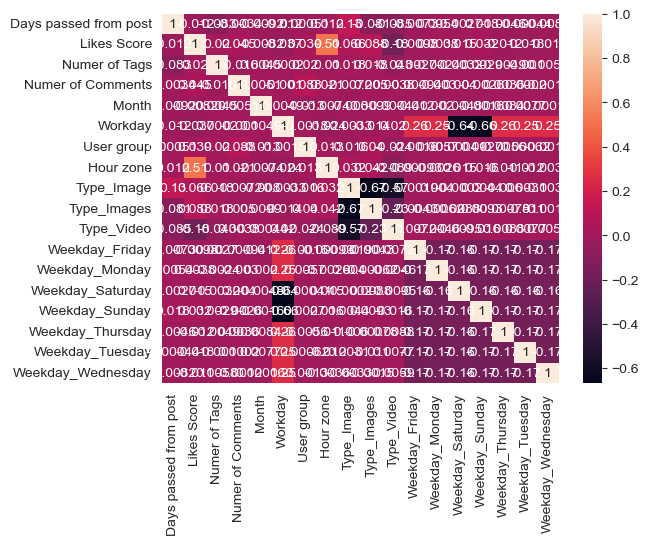

In [98]:
# 상관 heatmap
corr_matrix = df_encoded.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.show()



# 7. 데이터 분할
- 학습용과 테스트용 데이터로 분할한다.
- 이 과정은 모델을 평가하고 성능을 검증하는 데 중요한 단계이다.
- train_test_split() 함수를 사용한다.

In [99]:
origin = pd.read_csv('./data/Instagram_Data.csv')

In [100]:
# 데이터준비 
from sklearn.model_selection import train_test_split

X_ = origin.drop(columns=['Likes', 'Likes Score','Type','Date Posted'])
y_ = origin['Likes Score']
print(X_.shape, y_.shape)

# 학습/테스트 분할 
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2, random_state=42)
print(X_train_.shape, X_test_.shape, y_train_.shape, y_test_.shape)

(178922, 9) (178922,)
(143137, 9) (35785, 9) (143137,) (35785,)


In [101]:
# 학습 및 평가
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

lr = LinearRegression()
lr.fit(X_train_, y_train_)

# 평가 - score 기본 평가지표 R^2 (결정계수)
print(lr.score(X_train_, y_train_), lr.score(X_test_, y_test_))


0.017058693726008767 0.0013833752656855491


In [102]:
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'''
[최종점수]
MSE 점수 : {mse},
MAE 점수 : {mae},
RMSE 점수 : {rmse},
R² 점수 : {r2}
''')



In [103]:
y_pred = lr.predict(X_test_)
evaluate_regression(y_test_, y_pred)


[최종점수]
MSE 점수 : 0.044504374126873164,
MAE 점수 : 0.16660443683737608,
RMSE 점수 : 0.21096059851752688,
R² 점수 : 0.0013833752656855491



In [104]:
# 데이터준비 
from sklearn.model_selection import train_test_split
X = df_encoded.drop('Likes Score', axis=1)
y = df_encoded['Likes Score']
print(X.shape, y.shape)

# 학습/테스트 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(167224, 17) (167224,)
(133779, 17) (33445, 17) (133779,) (33445,)


In [105]:
# 학습 및 평가
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

# 평가 - score 기본 평가지표 R^2 (결정계수)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))


0.28161793628828935 0.2836581640293462


In [106]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.81114098, -0.52694404,  0.09646311, ..., -0.41469051,
        -0.40935312, -0.40742195],
       [-0.77018747, -0.52694404, -0.03129608, ..., -0.41469051,
        -0.40935312, -0.40742195],
       [ 0.55380376, -0.52694404,  0.17561113, ..., -0.41469051,
        -0.40935312,  2.45445785],
       ...,
       [-0.37329307, -0.24195264, -0.00812014, ..., -0.41469051,
        -0.40935312, -0.40742195],
       [ 0.36596061, -0.52694404, -0.03836547, ..., -0.41469051,
         2.44287868, -0.40742195],
       [ 1.07794675,  2.60796132, -0.04259252, ..., -0.41469051,
        -0.40935312, -0.40742195]])

In [107]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('lr', LinearRegression())
])

# 훈련
model.fit(X_train_scaled, y_train)  # 다항변환후 학습
print(model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test))


0.6933284436087055 0.6692390909320178


In [108]:
y_pred = model.predict(X_test_scaled)
evaluate_regression(y_test, y_pred)


[최종점수]
MSE 점수 : 0.014766392178234162,
MAE 점수 : 0.09476979205749249,
RMSE 점수 : 0.12151704480538589,
R² 점수 : 0.6692390909320178

